In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("house_prices.csv")

# Display first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Basic statistics of the dataset
print(df.describe())




   Size  Number of Rooms  Location   Price
0  1200                3     Urban  120000
1  2500                4  Suburban  180000
2  1800                3     Rural  100000
3  3000                5     Urban  250000
4  1000                2  Suburban   95000
Size               0
Number of Rooms    0
Location           0
Price              0
dtype: int64
              Size  Number of Rooms          Price
count    10.000000        10.000000      10.000000
mean   2340.000000         3.900000  177500.000000
std     989.051173         1.197219   78995.428841
min    1000.000000         2.000000   95000.000000
25%    1575.000000         3.000000  122500.000000
50%    2350.000000         4.000000  150000.000000
75%    2925.000000         4.750000  232500.000000
max    4000.000000         6.000000  320000.000000


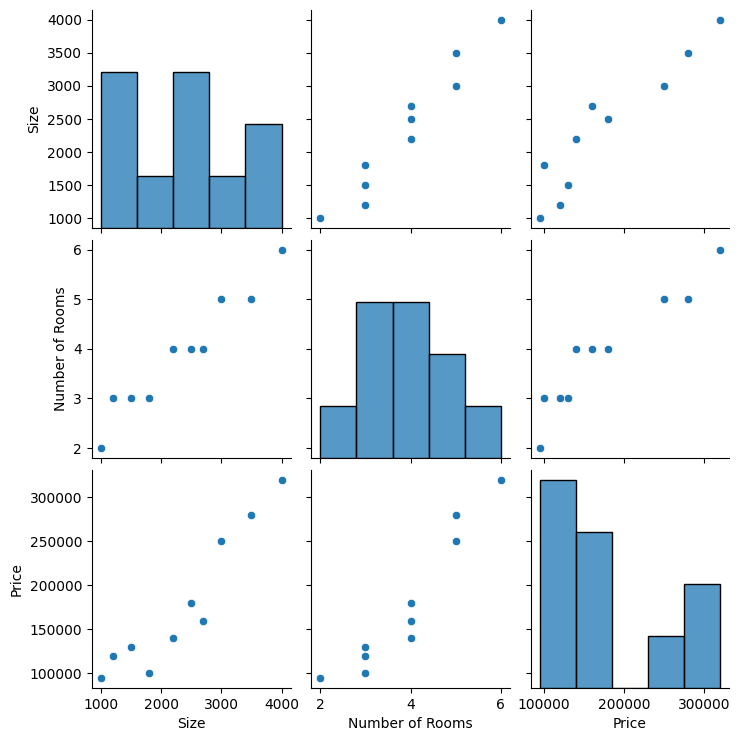

In [7]:
# Visualizing data distribution
sns.pairplot(df)
plt.show()

In [9]:
# Fill missing values (if any)
df.fillna(df.select_dtypes(include=["number"]).median(), inplace=True)


In [12]:
# Define numerical and categorical features
num_features = ["Size", "Number of Rooms"]
cat_features = ["Location"]

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ("num_scaler", StandardScaler(), num_features),
    ("cat_encoder", OneHotEncoder(), cat_features)
])


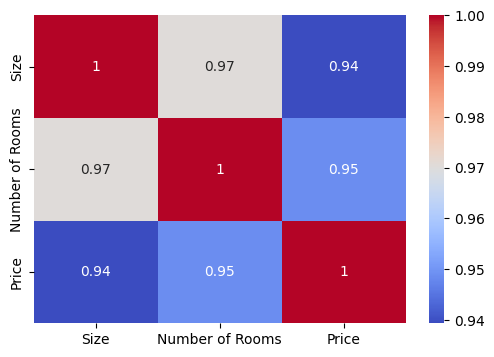

In [13]:
# Compute correlation matrix only for numeric columns
corr_matrix = df.select_dtypes(include=["number"]).corr()

# Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [14]:
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Create a pipeline with preprocessing and model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_scaler',
                                                  StandardScaler(),
                                                  ['Size', 'Number of Rooms']),
                                                 ('cat_encoder',
                                                  OneHotEncoder(),
                                                  ['Location'])])),
                ('regressor', LinearRegression())])

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate RMSE and R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


RMSE: 20080.134600035817
R² Score: -3.0321180555555562
